# Simple example of a fully connected NN for the MNIST dataset in TensorFlow

In [87]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt 
import idx2numpy

# Import dataset and convert to one-hot encoding and a [m,784] matrix

In [88]:
Y_test_classes = idx2numpy.convert_from_file('data/t10k-labels.idx1-ubyte')
X_test = idx2numpy.convert_from_file('data/t10k-images.idx3-ubyte')

Y_train_classes = idx2numpy.convert_from_file('data/train-labels.idx1-ubyte')
X_train = idx2numpy.convert_from_file('data/train-images.idx3-ubyte')

Digit= 5 Digit Encoded= [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


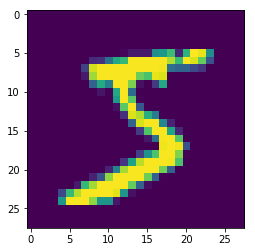

In [89]:
number_of_classes = np.unique(Y_test_classes).size

Y_test = np.eye(number_of_classes)[Y_test_classes]
Y_train = np.eye(number_of_classes)[Y_train_classes]

print("Digit=", Y_train_classes[0], "Digit Encoded=", Y_train[0])

plt.imshow(X_train[0])

In [90]:
# Convert input from image to 
X_test = np.reshape(X_test,(Y_test_classes.size,28*28))
X_train = np.reshape(X_train,(Y_train_classes.size,28*28))

# Setup simple NN tensorflow model

In [95]:
X = tf.placeholder(tf.float32, shape=[None, 28*28], name="input_image")
Y = tf.placeholder(tf.float32, shape=[None, 10], name="labels")

W = tf.Variable(tf.zeros([28*28,10]))
b = tf.Variable(tf.zeros([10]))
                
# Network is a simple single softmax activation layer 
prediction = tf.nn.softmax(tf.matmul(X, W) + b)
                
# Cost function will use cross entropy
cost_fn = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=prediction))

# Optimizer
learning_rate = 0.01
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost_fn) 
#GradientDescentOptimizer(learning_rate).minimize(cost_fn)

# Train model check performance

Accuracy Train= 85.10%
Accuracy Test= 85.83%


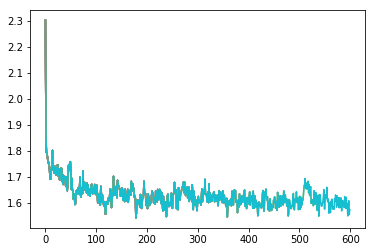

In [98]:
# global execution engine variable initializer 
init = tf.global_variables_initializer()

# Setup model to run predictions and calculate accuracy 
# Evaluate predictions using tf.argmax to find call
correct_predictions = tf.equal(tf.argmax(Y,1), tf.argmax(prediction,1 ))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

with tf.Session() as sess:
    sess.run(init)
    
    iterations = 10
    batch_size = 1000
    costs = []
    
    batches_in_training_set = math.floor(X_train.shape[0] / batch_size)
    for i in range(iterations):
        for b in range(batches_in_training_set):
            # Would be better to randomize the batches but this is OK for now
            X_train_batch = X_train[(b*batch_size):((b+1)*batch_size),:]
            Y_train_batch = Y_train[(b*batch_size):((b+1)*batch_size),:]
                
            _, cost = sess.run([optimizer,cost_fn], {X: X_train_batch, Y:Y_train_batch})
            costs.append(cost)
            
        plt.plot(costs)
        
    print("Accuracy Train=", "{:.2f}%".format(100*sess.run(accuracy, {X: X_train, Y: Y_train})))
    print("Accuracy Test=", "{:.2f}%".format(100*sess.run(accuracy, {X: X_test, Y: Y_test})))
    